# Regression with a mixture density network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mdn_class import MDN_reg_class,MDN_reg_indep_class
from util import gpu_sess,nzr
%matplotlib inline
print ("Packages loaded.")

Packages loaded.


### Train with 'MDN_reg_indep_class
- Let each output dimension to have each mixture probabilities'

In [2]:
# Instantiate the MDN class 
tf.reset_default_graph() # Reset graph
tf.set_random_seed(seed=1)
np.random.seed(seed=1)
sess = gpu_sess()
M = MDN_reg_indep_class(_name='mdn',_x_dim=1,_y_dim=2,_k=20,_hids=[128,128],_actv=tf.nn.tanh,
              _sig_max=1.0,_SCHEDULE_SIG_MAX=True,_l2_reg_coef=1e-4,
              _sess=sess,_VERBOSE=False)
print ("[%s] instantiated"%(M.name))

[mdn] instantiated


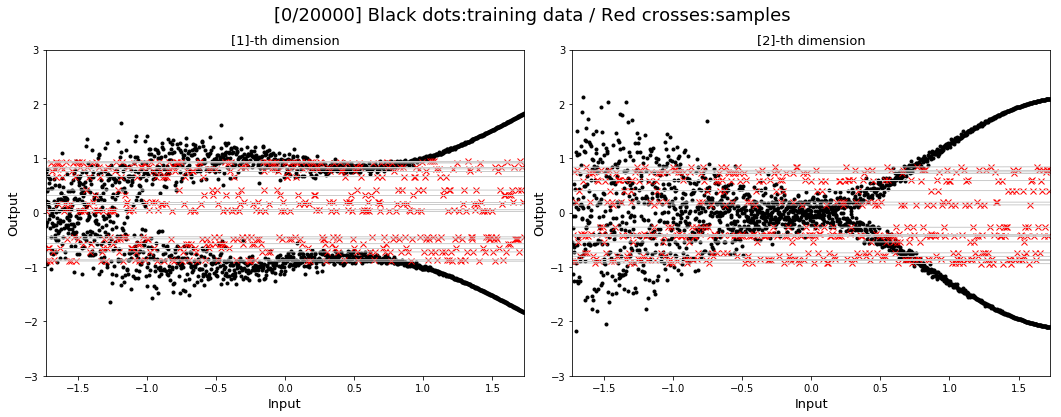

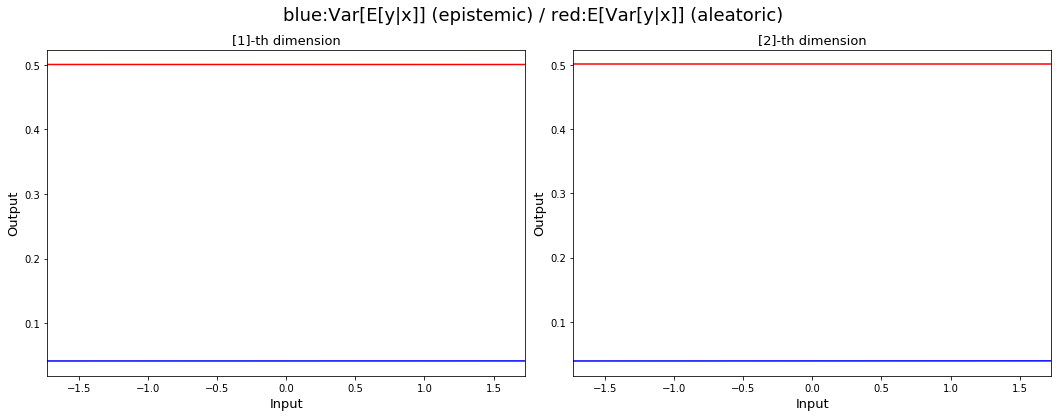

[000/20000] cost:11484916.0000


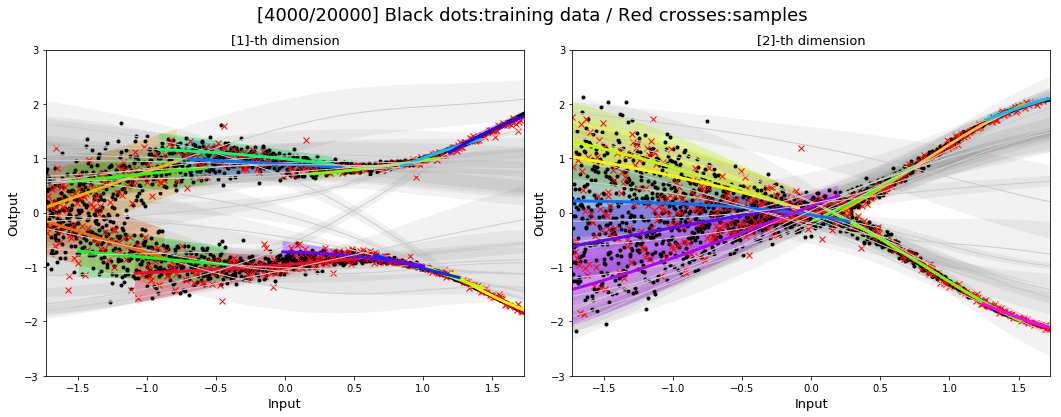

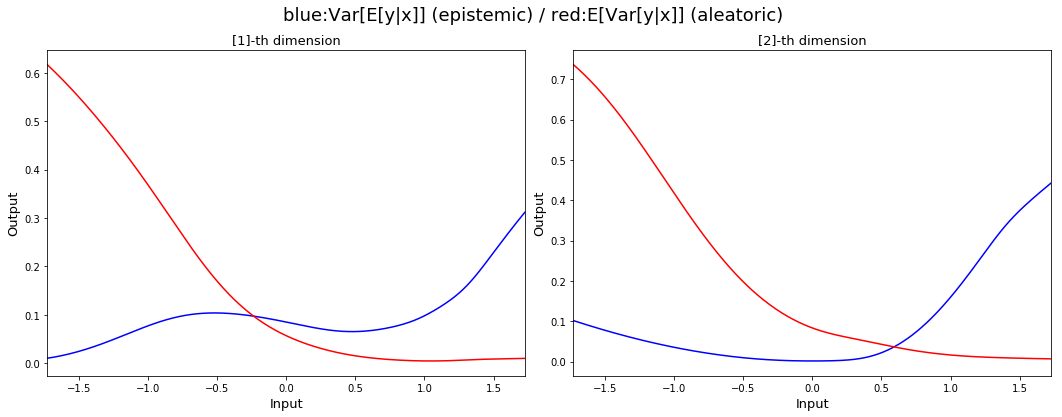

[4000/20000] cost:-0.0176


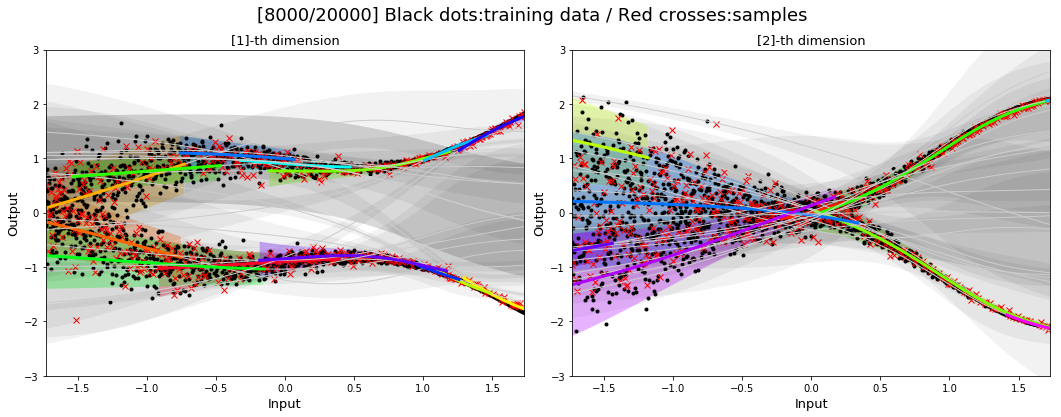

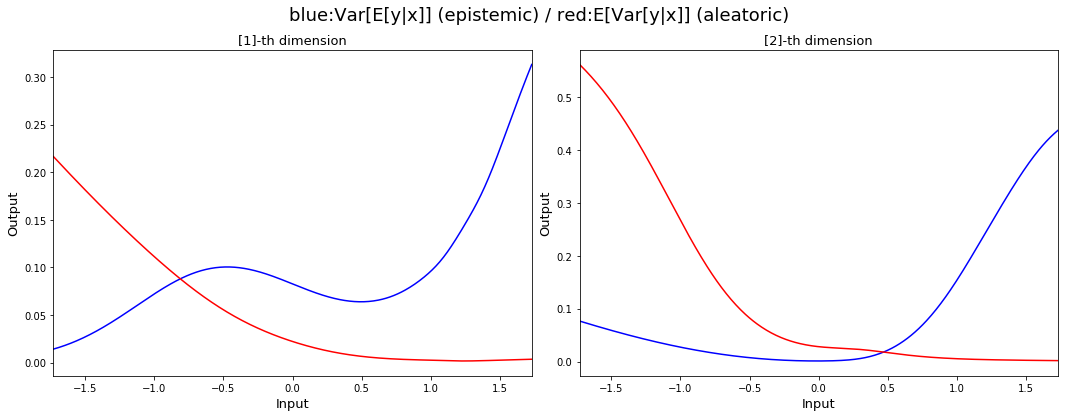

[8000/20000] cost:0.1067


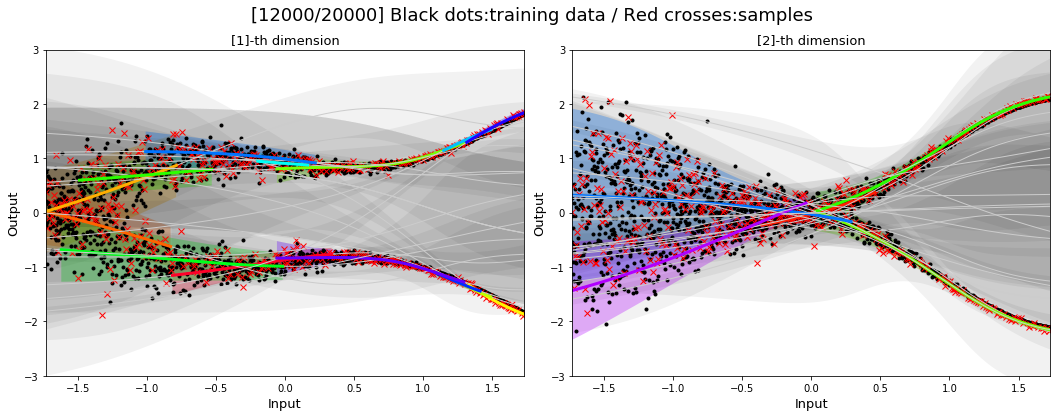

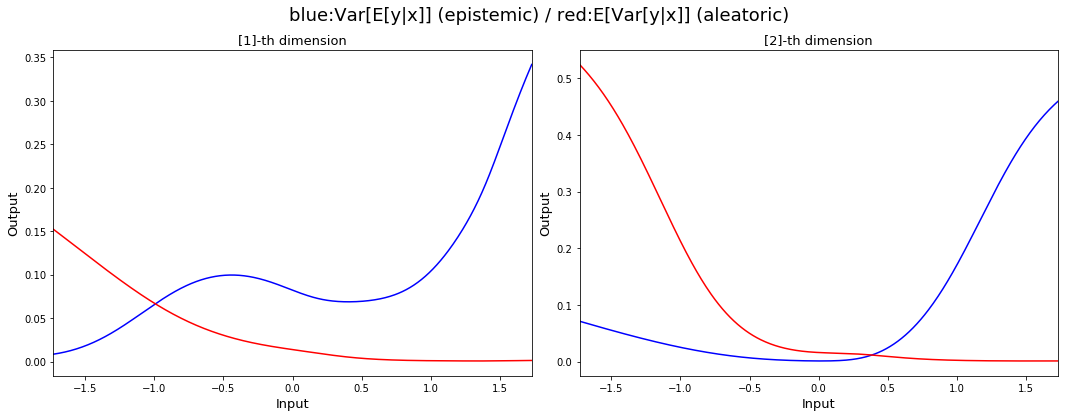

[12000/20000] cost:-0.1980


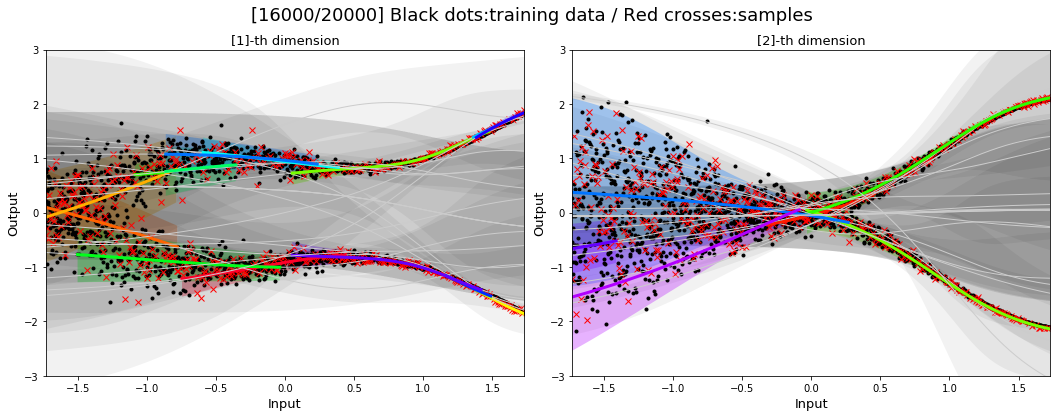

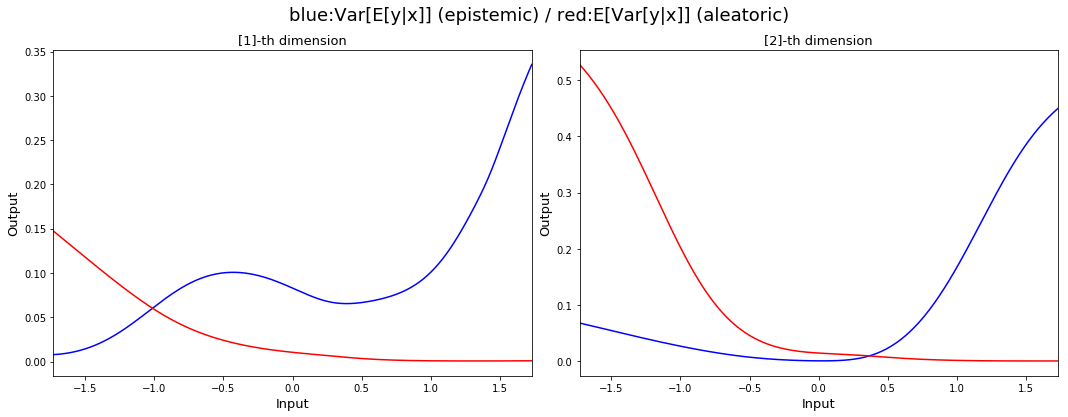

[16000/20000] cost:-0.2895


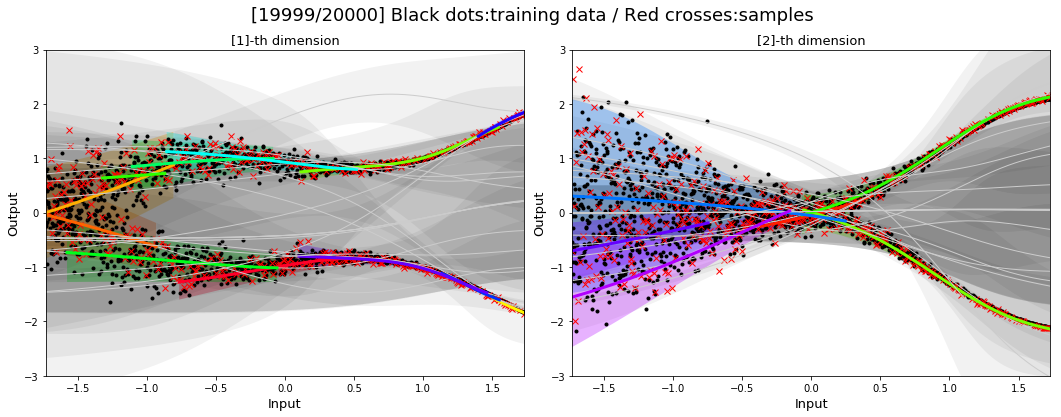

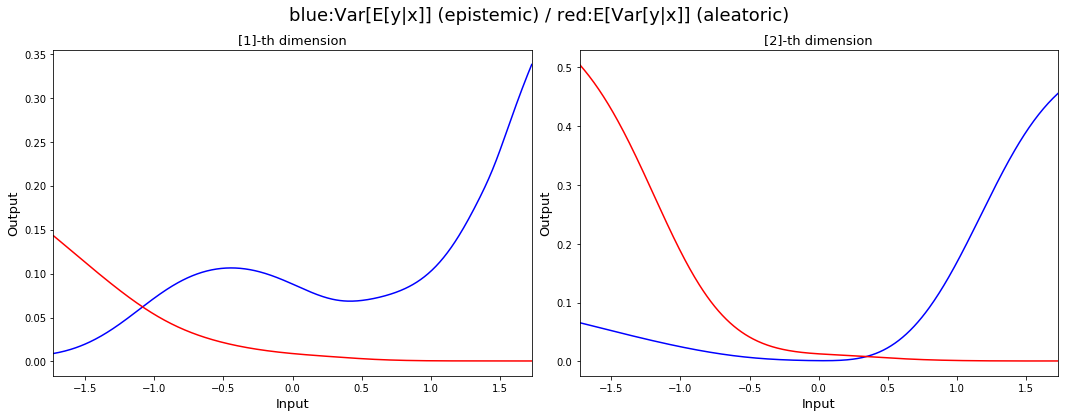

[19999/20000] cost:-0.2590


In [3]:
# Training data
x_min,x_max,n_train_half,y_max,var_scale = 0,100,1000,100,1.0 # 0,100,1000,100,0.5 
x_train = np.linspace(x_min,x_max,n_train_half).reshape((-1,1)) # [1000 x 1]
y_train = np.concatenate((y_max*np.sin(2.0*np.pi*x_train/(x_max-x_min))+2*y_max*x_train/x_max,
                          y_max*np.cos(2.0*np.pi*x_train/(x_max-x_min)))+2*y_max*x_train/x_max,
                          axis=1) # [1000 x 2]
x_train,y_train = np.concatenate((x_train,x_train),axis=0),np.concatenate((y_train,-y_train),axis=0)
n_train = y_train.shape[0]
y_train = y_train + var_scale*y_max*np.random.randn(n_train,2)*np.square(1-x_train/x_max) # add noise 
nzr_x_train = nzr(x_train)
x_train = nzr_x_train.get_nzdval(x_train) # normalize training input
y_train = nzr(y_train).nzd_data # normalize training output 

# Train the mixture density network 
max_iter = 20000
x_test = np.linspace(x_min,x_max,500).reshape((-1,1))
x_test = nzr_x_train.get_nzdval(x_test) # normalize test input
M.train(_x_train=x_train,_y_train=y_train,_x_test=x_test,
        _max_iter=max_iter,_batch_size=256,
        _pi_th=0.1,_SHOW_EVERY=5,_figsize=(18,6),_ylim=[-3,+3])

### Train with 'MDN_reg_class'
- Let each mixture to model multivariate Gaussian

In [4]:
# Instantiate the MDN class 
tf.reset_default_graph() # Reset graph
tf.set_random_seed(seed=1)
np.random.seed(seed=1)
sess = gpu_sess()
M = MDN_reg_class(_name='mdn',_x_dim=1,_y_dim=2,_k=20,_hids=[128,128],_actv=tf.nn.tanh,
              _sig_max=1.0,_SCHEDULE_SIG_MAX=True,_l2_reg_coef=1e-4,
              _sess=sess,_VERBOSE=False)
print ("[%s] instantiated"%(M.name))

[mdn] instantiated


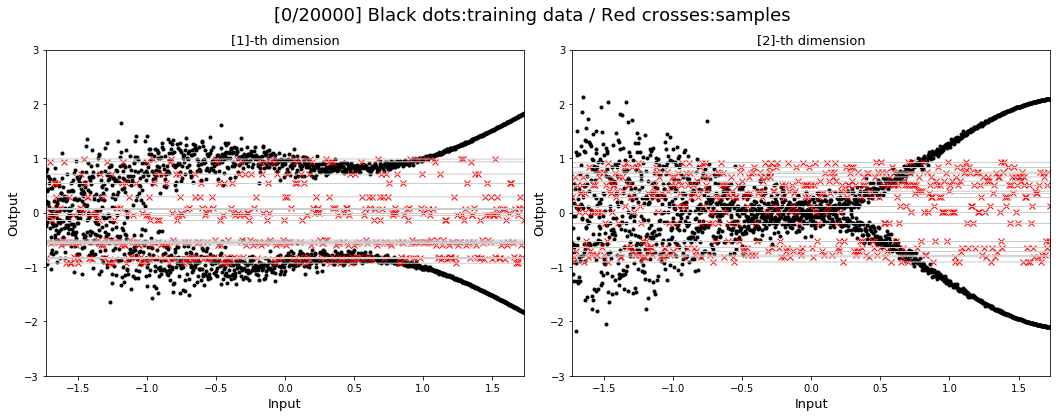

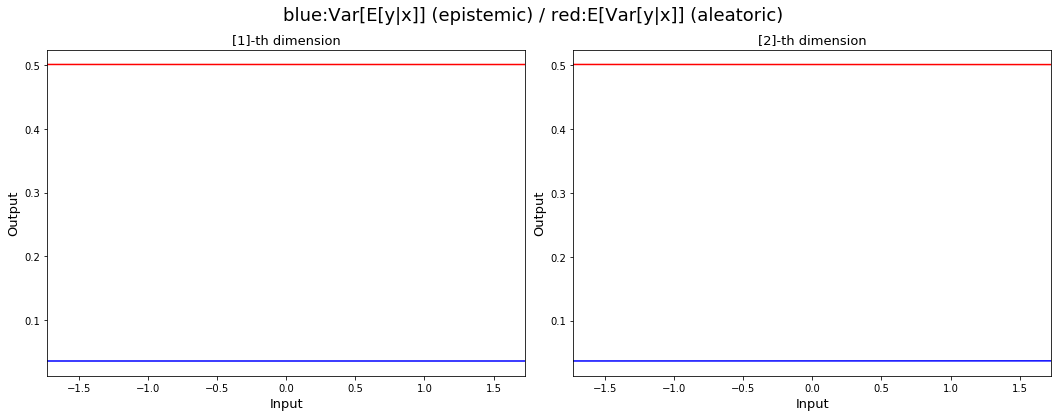

[000/20000] cost:31700858.0000


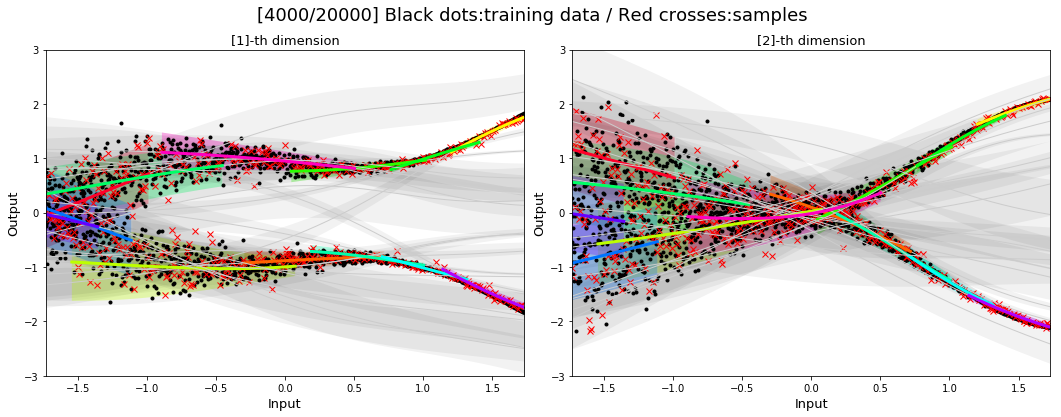

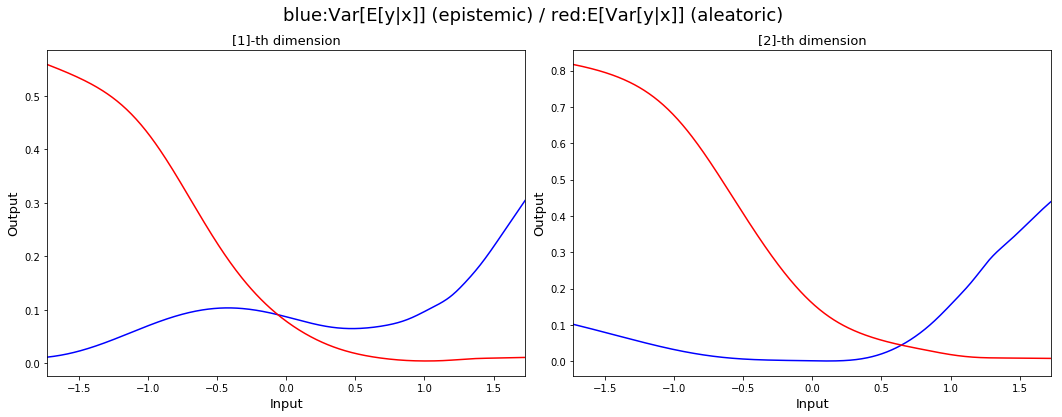

[4000/20000] cost:-0.3269


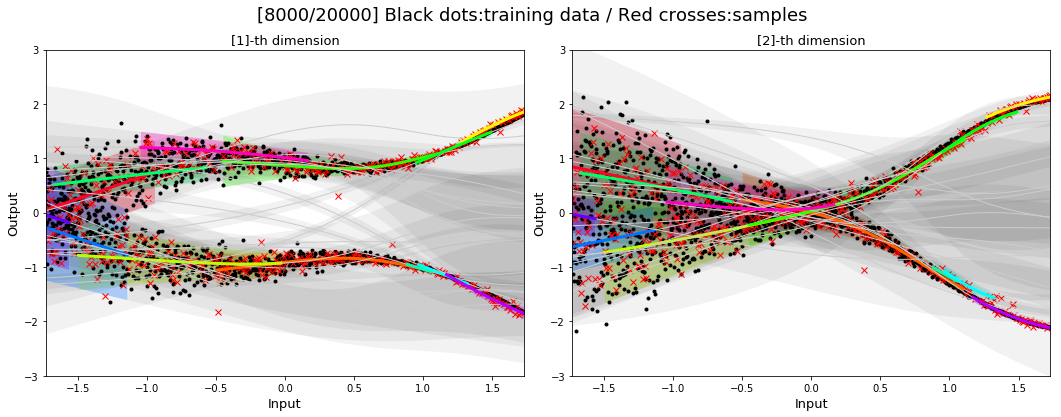

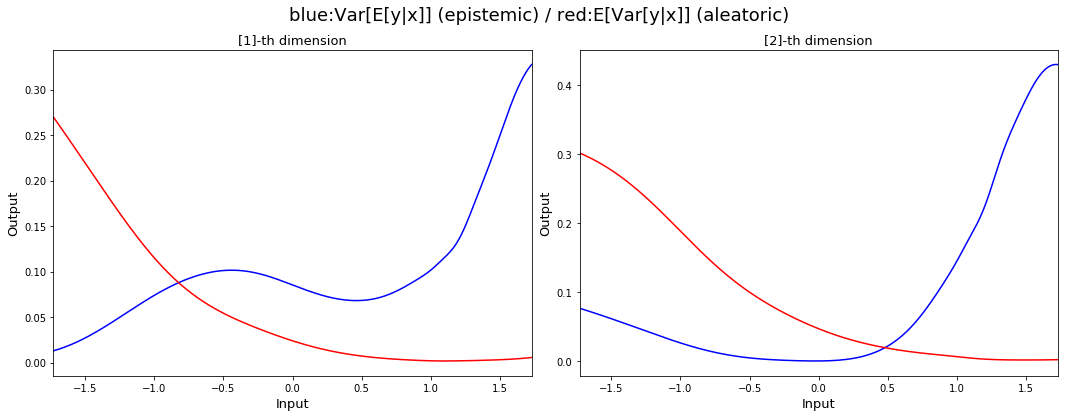

[8000/20000] cost:0.4146


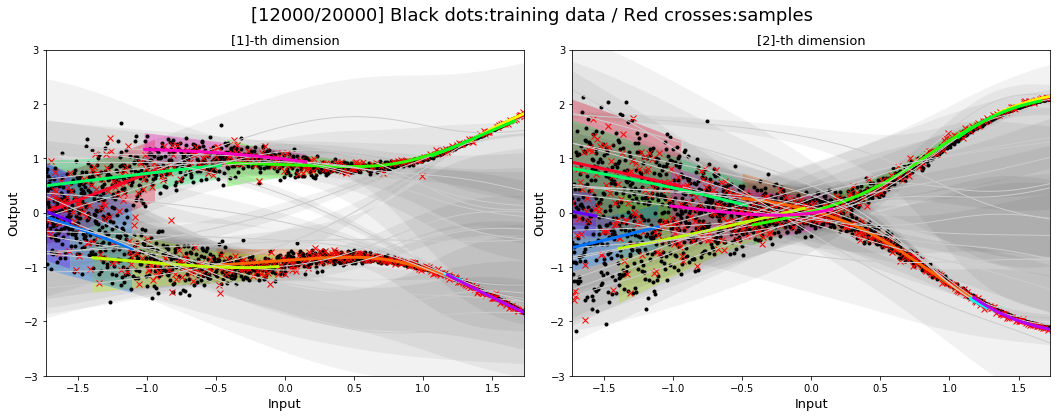

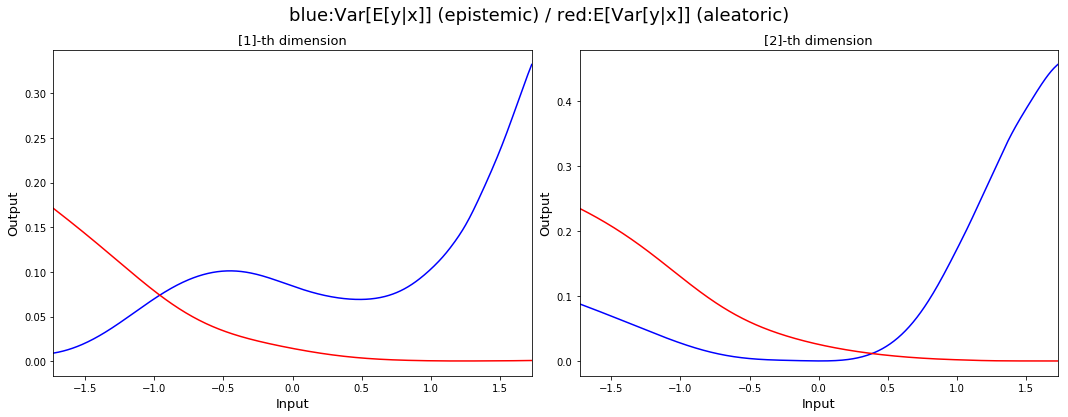

[12000/20000] cost:-1.0141


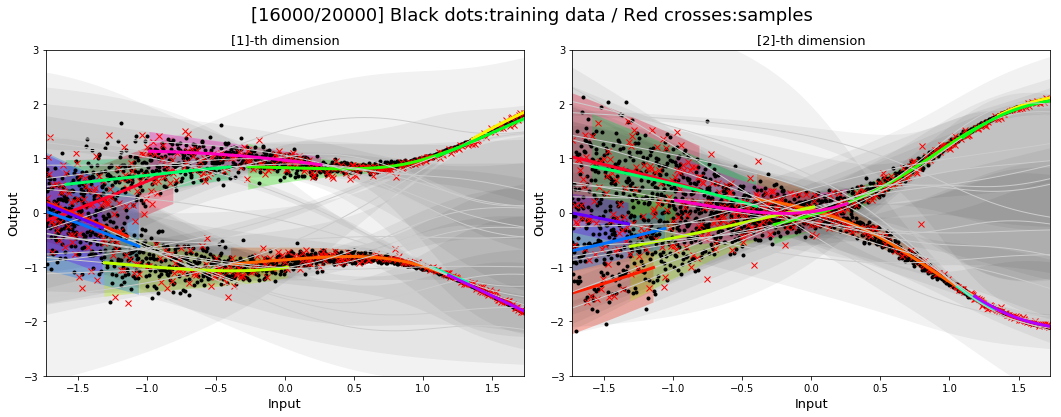

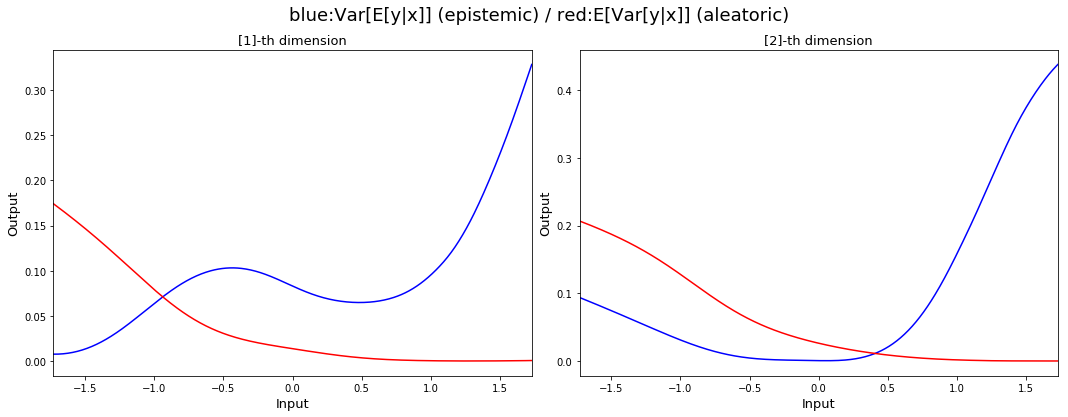

[16000/20000] cost:-0.5445


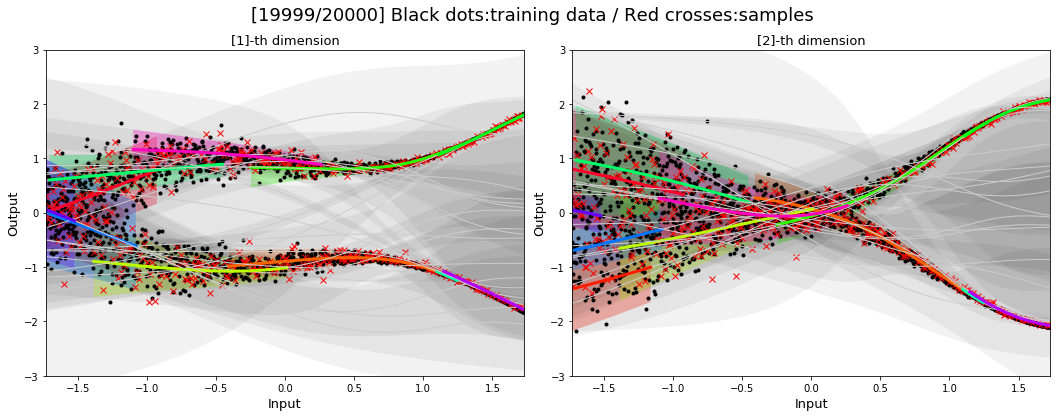

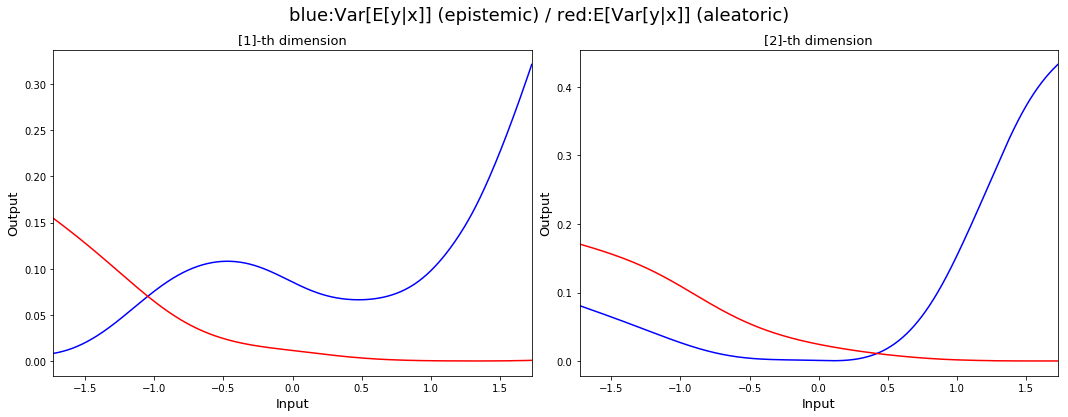

[19999/20000] cost:-0.5776


In [5]:
# Training data
x_min,x_max,n_train_half,y_max,var_scale = 0,100,1000,100,1.0 # 0,100,1000,100,0.5 
x_train = np.linspace(x_min,x_max,n_train_half).reshape((-1,1)) # [1000 x 1]
y_train = np.concatenate((y_max*np.sin(2.0*np.pi*x_train/(x_max-x_min))+2*y_max*x_train/x_max,
                          y_max*np.cos(2.0*np.pi*x_train/(x_max-x_min)))+2*y_max*x_train/x_max,
                          axis=1) # [1000 x 2]
x_train,y_train = np.concatenate((x_train,x_train),axis=0),np.concatenate((y_train,-y_train),axis=0)
n_train = y_train.shape[0]
y_train = y_train + var_scale*y_max*np.random.randn(n_train,2)*np.square(1-x_train/x_max) # add noise 
nzr_x_train = nzr(x_train)
x_train = nzr_x_train.get_nzdval(x_train) # normalize training input
y_train = nzr(y_train).nzd_data # normalize training output 

# Train the mixture density network 
max_iter = 20000
x_test = np.linspace(x_min,x_max,500).reshape((-1,1))
x_test = nzr_x_train.get_nzdval(x_test) # normalize test input
M.train(_x_train=x_train,_y_train=y_train,_x_test=x_test,
        _max_iter=max_iter,_batch_size=256,
        _pi_th=0.1,_SHOW_EVERY=5,_figsize=(18,6),_ylim=[-3,+3])